## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

Step1:构建实验数据

In [1]:
import numpy as np
randomData = np.random.random((20,2))
print(randomData)

[[0.42263935 0.70096303]
 [0.43338333 0.46951975]
 [0.33474427 0.3909981 ]
 [0.22464168 0.25140504]
 [0.55349898 0.98968987]
 [0.28606732 0.14836812]
 [0.9233147  0.76168098]
 [0.55586944 0.80845912]
 [0.85037112 0.49781062]
 [0.13079829 0.16745221]
 [0.28519077 0.68120855]
 [0.94044029 0.82347412]
 [0.9754404  0.93130927]
 [0.27736426 0.99829097]
 [0.21760075 0.80720756]
 [0.3534398  0.41159243]
 [0.64257659 0.52660495]
 [0.34027497 0.82647774]
 [0.29678531 0.57961346]
 [0.03207163 0.61637854]]


In [2]:
# 假设自变量X包含两个特征维度
X = randomData[:]
print(X)

[[0.42263935 0.70096303]
 [0.43338333 0.46951975]
 [0.33474427 0.3909981 ]
 [0.22464168 0.25140504]
 [0.55349898 0.98968987]
 [0.28606732 0.14836812]
 [0.9233147  0.76168098]
 [0.55586944 0.80845912]
 [0.85037112 0.49781062]
 [0.13079829 0.16745221]
 [0.28519077 0.68120855]
 [0.94044029 0.82347412]
 [0.9754404  0.93130927]
 [0.27736426 0.99829097]
 [0.21760075 0.80720756]
 [0.3534398  0.41159243]
 [0.64257659 0.52660495]
 [0.34027497 0.82647774]
 [0.29678531 0.57961346]
 [0.03207163 0.61637854]]


In [3]:
# 生成Y
import random
def randomGernerateY(X:[[float,float]])->[float]:
    print(randomGernerateY.__annotations__)
    
    return [3.14*x_i[0]+2.71*x_i[1]+random.randint(-5, 5) for x_i in X]

Y = randomGernerateY(X)
print(Y)

{'X': [[<class 'float'>, <class 'float'>]], 'return': [<class 'float'>]}
[5.226697382310128, 7.633222180682621, -2.8892981454842817, 4.386682535121501, -0.5799536595391137, 4.300328987368818, 8.963363634723674, 0.936354255268987, -0.9807678966898301, 2.864502116924443, -2.25842582995274, 9.18459738814544, 10.58673098567086, 3.576292327132836, -2.129201161033283, 1.2252164775912036, 1.4447899028795796, 0.308218094166715, 7.502658342599679, 5.771090776158797]


Step2:拟合二元线性回归方程

In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X,Y)

In [5]:
# 计算二元线性回归模型决定系数R^2
reg.score(X,Y)

0.13689066025469987

In [6]:
# 计算回归系数，斜率
reg.coef_

array([ 5.77737193, -1.10609814])

In [7]:
# 回归方程常数项
reg.intercept_

1.31688036937768

In [8]:
# 用回归方程预测
reg.predict(np.array([[2.2,3.4]]))

array([10.26636496])

In [9]:
# 写出回归方程
def bi_linearRegressionEquation(X:[float,float])->float:
    return reg.coef_[0]*X[0]+reg.coef_[1]*X[1]+reg.intercept_

In [10]:
# reg.predict和写出的回归方程的预测结果是一致的
bi_linearRegressionEquation([2.2,3.4])

10.266364959433957

In [ ]:
# # 基于回归方程计算全部预测值
# Y_hat = [reg.coef_[0]*x_i[0]+reg.coef_[1]*x_i[1]-reg.intercept_ for x_i in X]
# print(Y_hat)

Step3：可视化回归结果

二元回归方程的图像是一个平面。  
这个平面与两个坐标轴平面相交的直线分别为：  
Y_1 = 斜率_1 * X_1 + 截距  
Y_2 = 斜率_2 * X_2 + 截距  

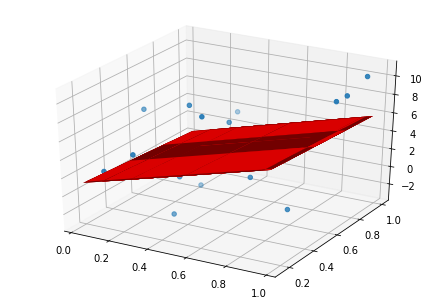

In [11]:
# 回归结果可视化
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

# 绘制散点图
ax.scatter(X[:,0],X[:,1],Y)

# 绘制二元线性回归方程的平面
# 将点在X轴和Y轴的坐标值列表转化成坐标矩阵（就是把n个坐标值向量复制n次，生成n*n矩阵）
X_meshgrid, Y_meshgrid = np.meshgrid(X[:,0],X[:,1]) 
# 将坐标矩阵带入回归方程计算点在Z轴的坐标值矩阵
Z_meshgrid = reg.coef_[0]*X_meshgrid+reg.coef_[1]*Y_meshgrid+reg.intercept_

ax.plot_surface(X_meshgrid,Y_meshgrid,Z_meshgrid,rcount=20,ccount=20,color='red')
plt.show()

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

Step1:构造实验数据

In [1]:
import numpy as np

randomData = np.random.random((20,2))
print(randomData)

[[0.72756738 0.79629314]
 [0.31071607 0.77459302]
 [0.33117111 0.31989256]
 [0.77026448 0.64996243]
 [0.04962395 0.23997573]
 [0.29302154 0.92327556]
 [0.41208321 0.78476839]
 [0.29846755 0.82342467]
 [0.94194965 0.54589654]
 [0.6888874  0.83016344]
 [0.55156705 0.24643365]
 [0.15565021 0.23723487]
 [0.57777583 0.84954036]
 [0.06855454 0.98129578]
 [0.07060447 0.40070469]
 [0.73013738 0.09134598]
 [0.70612517 0.10367353]
 [0.84028371 0.13968132]
 [0.02638581 0.00587734]
 [0.92627646 0.81807017]]


In [2]:
# 假设自变量X包含两个特征维度
X = randomData[:]
print(X)

[[0.72756738 0.79629314]
 [0.31071607 0.77459302]
 [0.33117111 0.31989256]
 [0.77026448 0.64996243]
 [0.04962395 0.23997573]
 [0.29302154 0.92327556]
 [0.41208321 0.78476839]
 [0.29846755 0.82342467]
 [0.94194965 0.54589654]
 [0.6888874  0.83016344]
 [0.55156705 0.24643365]
 [0.15565021 0.23723487]
 [0.57777583 0.84954036]
 [0.06855454 0.98129578]
 [0.07060447 0.40070469]
 [0.73013738 0.09134598]
 [0.70612517 0.10367353]
 [0.84028371 0.13968132]
 [0.02638581 0.00587734]
 [0.92627646 0.81807017]]


In [3]:
# 生成因变量序列Y
import random
def randomGernerateY(X:[[float,float]])->[float]:
    print(randomGernerateY.__annotations__)
    
    return [3.14*x_i[0]+2.71*x_i[1]+random.randint(-5, 5) for x_i in X]

Y = randomGernerateY(X)
print(Y)

{'X': [[<class 'float'>, <class 'float'>]], 'return': [<class 'float'>]}
[6.442515975697077, 4.074795543051575, -0.09321389094344212, 4.180028659796092, 0.8061534480880344, 6.422164397270629, -0.579336370526208, 5.168668959714217, 7.437101521875876, 8.412849385614784, -0.6002442612690468, -1.8683518392502025, 2.116470494356136, 5.874572824649649, 4.307607736137701, 0.5401789655807048, -2.501811712991215, 6.0170272224212, 1.0987790386794314, 10.125478257205359]


Step2：生成KNN模型

In [4]:
# 构建KNN模型
def KNN_Model(X:[[float]],y:[float])->'[(X,y)]':
    return [ ( X_i,y_i) for X_i,y_i in zip(X,y)]

In [5]:
# 基于实验数据生成KNN模型
KNN_model = KNN_Model(X=X,y=Y)
print('当前KNN模型包含%d个数据点'%len(KNN_model))

当前KNN模型包含20个数据点


Step3:构建基于KNN的预测函数

In [6]:
from scipy.spatial.distance import cosine
import numpy as np

In [7]:
# 构建计算两个自变量向量之间距离的函数。
# 本例采用余弦距离：
def cosineDistance(X_1,X_2):
    return cosine(X_1,X_2)

In [8]:
# 基于KNN的预测函数有3个步骤：找出离x最近的k个x_i—>找出每个x_i对应的y_i—>计算出这些y_i的均值并返回。
# 自变量向量x之间的距离可以用余弦距离度量。
# 找到最近的k个点后，可以用这些点的因变量的均值作为预测结果。

# 构建预测函数
def KNN_Predict(X:[float], KNNModel:'[(X,y)]', distance:'function', k=5)->float:
    if len(X) != len(KNNModel[0][0]):return '输入向量的维度数与模型不一致，请重新输入。'
    
    most_similars = sorted(KNNModel, key=lambda dot_i: distance(dot_i[0], X))[:k]
    print('KNN模型中距离输入向量最近的%d个数据点：'%k)
    print(most_similars)
    
    y_hats = [y_i for x_i, y_i in most_similars]
    return np.mean(y_hats)

In [9]:
# 基于Step2生成的KNN模型预测新的自变量对应的因变量：

preResult = KNN_Predict(X=[5.1,6.5], KNNModel=KNN_model, distance=cosineDistance)
print('\nKNN模型的预测结果为：%f'%preResult)

KNN模型中距离输入向量最近的5个数据点：
[(array([0.6888874 , 0.83016344]), 8.412849385614784), (array([0.57777583, 0.84954036]), 2.116470494356136), (array([0.72756738, 0.79629314]), 6.442515975697077), (array([0.15565021, 0.23723487]), -1.8683518392502025), (array([0.33117111, 0.31989256]), -0.09321389094344212)]

KNN模型的预测结果为：3.002054


#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

Step1：生成实验数据

In [1]:
# 课堂上的mock_data 'pet'恰好跟'bought'完全一致，不利于展示决策树的原理，这里调整了pet序列的2个值。
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'pet': [1, 1, 1, 1, 1, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [2]:
import pandas as pd

In [3]:
dataset = pd.DataFrame.from_dict(mock_data)

In [4]:
dataset

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
1,F,-10,1,1,1
2,F,+10,2,1,1
3,F,+10,1,1,0
4,M,+10,1,1,0
5,M,+10,1,0,0
6,M,-10,2,1,1


Step2：定义选择最优特征的函数

信息熵 $ Entropy = -\sum_i^n Pr(x_i) log(Pr(x_i)) $

In [5]:
from collections import Counter

In [6]:
import numpy as np

In [7]:
# 计算一个列表的信息熵
def entropy(elements):
    '''群体的混乱程度'''
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    return - sum(p * np.log2(p) for p in probs)

In [8]:
from icecream import ic

In [9]:
# 找出条件熵H(D|A)最小的特征。
def find_mini_conditional_entropy_feature(training_data: pd.DataFrame, dependent_feature: str) -> tuple:
    independent_features_set = set(training_data.columns.tolist()) - {dependent_feature} #集合保存全部自变量特征维度
    spliter = None # 保存最优特征维度及特征值：(特征维度,特征值)
    min_entropy = float('inf') # 保存最小熵的值，初始化为正无穷
    
    for f in independent_features_set:
#         ic(f)
        values = set(training_data[f]) # 当前特征维度下的特征值集合
#         ic(values)
        for v in values:
            dependent_spliter_1 = training_data[training_data[f] == v][dependent_feature].tolist() # 等于特征值的因变量序列
#             ic(sub_spliter_1)
            # split by the current feature and one value

            entropy_1 = entropy(dependent_spliter_1) # 等于特征值的因变量序列的熵
#             ic(entropy_1)
            
            dependent_spliter_2 = training_data[training_data[f] != v][dependent_feature].tolist() # 不等于特征值的因变量序列
#             ic(sub_spliter_2)
            
            entropy_2 = entropy(dependent_spliter_2) # 不等于特征值的因变量序列的熵
#             ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2 # 当前特征维度及特征值的熵
#             ic(entropy_v)
            
            if entropy_v <= min_entropy: # 保存最小熵，和最小熵对应的特征维度及特征值
                min_entropy = entropy_v                
                spliter = (f, v)
    
#     print('spliter is: {}'.format(spliter))
#     print('the min entropy is: {}'.format(min_entropy))
    
    return spliter #(特征维度,特征值)

In [10]:
find_mini_conditional_entropy_feature(training_data=dataset, dependent_feature='bought')

('pet', 1)

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

Step1：生成实验数据

In [1]:
import numpy as np

randomData=np.random.random((20,2))
print(randomData)

[[0.76969606 0.21706717]
 [0.78481319 0.2441877 ]
 [0.33451361 0.64701886]
 [0.21229113 0.07842373]
 [0.47079975 0.33169344]
 [0.42615444 0.77041482]
 [0.44403302 0.90308212]
 [0.60420772 0.15241495]
 [0.7366171  0.3977698 ]
 [0.25172219 0.24270623]
 [0.77551162 0.53807754]
 [0.86464978 0.87595881]
 [0.03972692 0.55159063]
 [0.48457065 0.81046014]
 [0.59998834 0.25236012]
 [0.43111995 0.92372398]
 [0.46080236 0.68028362]
 [0.18387376 0.18930801]
 [0.37552182 0.59987566]
 [0.38134859 0.63244742]]


In [2]:
# 生成自变量向量序列X

X = randomData[:]
print(X)

[[0.76969606 0.21706717]
 [0.78481319 0.2441877 ]
 [0.33451361 0.64701886]
 [0.21229113 0.07842373]
 [0.47079975 0.33169344]
 [0.42615444 0.77041482]
 [0.44403302 0.90308212]
 [0.60420772 0.15241495]
 [0.7366171  0.3977698 ]
 [0.25172219 0.24270623]
 [0.77551162 0.53807754]
 [0.86464978 0.87595881]
 [0.03972692 0.55159063]
 [0.48457065 0.81046014]
 [0.59998834 0.25236012]
 [0.43111995 0.92372398]
 [0.46080236 0.68028362]
 [0.18387376 0.18930801]
 [0.37552182 0.59987566]
 [0.38134859 0.63244742]]


In [4]:
import random

In [5]:
# 生成因变量序列y

y = [3.14*x_i[0]+2.71*x_i[1]+random.randint(-5, 5) for x_i in X]
print(y)

[4.005097673321171, 7.126062069460658, 2.803793848042008, -4.120877550756236, -1.6227995756823717, 2.425949093277147, 8.841616209455285, -2.6897432597924618, 4.390933848525365, 5.4481415565925015, 6.8932966157158475, 1.088848684272378, 4.619553145047412, 5.717898831337212, 1.5678593136006689, 6.857008610669334, 4.290488008916794, -3.9096116919983523, 6.804801553733309, 3.9113670896836306]


Step2:生成KNN模型

In [6]:
# 构建KNN模型
def KNN_Model(X:[[float]],y:[float])->'[[X,y]]':
    return [ (X_i,y_i) for X_i,y_i in zip(X,y)]

In [7]:
# 基于实验数据生成KNN模型
KNN_model = KNN_Model(X=X,y=y)
print('当前KNN模型包含%d个数据点'%len(KNN_model))

# print(KNN_model)

当前KNN模型包含20个数据点


Step3:构建用于预测的K-Means函数

In [8]:
from scipy.spatial.distance import cosine
import numpy as np

In [9]:
# 构建计算两个自变量向量之间距离的函数。
# 本例采用余弦距离：
def cosineDistance(X_1,X_2):
    return cosine(X_1,X_2)

In [10]:
# 基于KNN的预测函数有3个步骤：找出离x最近的k个x_i—>找出每个x_i对应的y_i—>计算出这些y_i的均值并返回。
# 自变量向量x之间的距离可以用余弦距离度量。
# 找到最近的k个点后，可以用这些点的因变量的均值作为预测结果。

# 构建预测函数
def K_Means_predict(X:[float], KNNModel:'[(X,y)]', distance:'function', k=5)->float:
    if len(X) != len(KNNModel[0][0]):return '输入向量的维度数与模型不一致，请重新输入。'
    
    result_dict={'最近数据点':[],'预测结果':0.0}
    
    most_similars = sorted(KNNModel, key=lambda dot_i: distance(dot_i[0], X))[:k]
    result_dict['最近数据点']=most_similars
    
    y_hats = [y_i for x_i, y_i in most_similars]
    result_dict['预测结果']=np.mean(y_hats)
    
    return result_dict

In [11]:
# 基于Step2生成的KNN模型预测新的自变量对应的因变量：
X_input=[0.14,0.65]

result_dict = K_Means_predict(X=X_input, KNNModel=KNN_model, distance=cosineDistance)
print('KNN模型中距离输入向量最近的点：')
print(result_dict['最近数据点'])
print('\nKNN模型的预测结果为：%f'%result_dict['预测结果'])

KNN模型中距离输入向量最近的点：
[(array([0.03972692, 0.55159063]), 4.619553145047412), (array([0.43111995, 0.92372398]), 6.857008610669334), (array([0.44403302, 0.90308212]), 8.841616209455285), (array([0.33451361, 0.64701886]), 2.803793848042008), (array([0.42615444, 0.77041482]), 2.425949093277147)]

KNN模型的预测结果为：5.109584


Step4:可视化KNN模型与K-Means预测结果

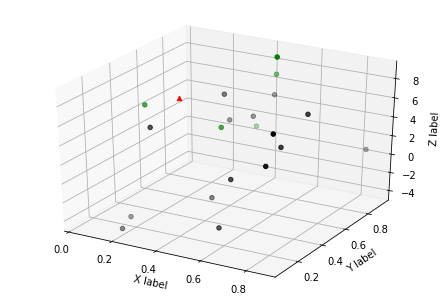

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

# 绘制散点图，区分三种点：1个预测结果数据点，k个邻近数据点，其他数据点

# 1个预测点的坐标向量
X_pre_1 = [X_input[0]]
X_pre_2 = [X_input[1]]
Y_pre = [result_dict['预测结果']]

# k个邻近点的坐标向量
X_k_1 = [ dot_i[0][0] for dot_i in result_dict['最近数据点']]
X_k_2 = [ dot_i[0][1] for dot_i in result_dict['最近数据点']]
Y_k = [ dot_i[1] for dot_i in result_dict['最近数据点']]


# 其他数据点的坐标向量
X_others_1 = [vec[0] for vec in X if vec[0] not in X_k_1]
X_others_2 = [vec[1] for vec in X if vec[1] not in X_k_2]
Y_others = [y_i for y_i in y if y_i not in Y_k]

ax.scatter(X_pre_1,X_pre_2,Y_pre,color='red',marker='^')
ax.scatter(X_k_1,X_k_2,Y_k,color='green')
ax.scatter(X_others_1,X_others_2,Y_others,color='black')
ax.set_xlabel('X label')
ax.set_ylabel('Y label')
ax.set_zlabel('Z label')
plt.show()

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:模型是对现实事物的抽象。现实事物往往非常复杂，模型只能对其主要特征进行抽象，所以模型只在某些特定条件、场景下才能正确描述、预测事物，而不可能完全模拟现实事物。

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:欠拟合是指算法训练得到的模型在训练集上表现差，没有学到数据的规律。  
引起欠拟合的原因包括：  
1 模型过于简单，例如数据本身是非线性的但使用了线性模型。  
2 特征太少，无法正确建立统计关系。  

过拟合是指算法在训练集上表现好，但在测试集上表现不好，泛化性能差。
引起过拟合的原因包括：  
1 模型过于复杂，以至于拟合了训练样本集中的噪声。此时需要选用更简单的模型，或者对模型进行裁剪。  
2 训练样本太少或者缺乏代表性。此时需要增加样本数，或者增加样本的多样性。  
3 训练样本噪声太大，导致模型拟合了这些噪声。这时需要剔除噪声数据或者改用对噪声不敏感的模型。  

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:  
$Precision(精确率) = \frac{True\&Positive(TP)}{True\&Positive(TP)+False\&Positive(FP)}$  

$Recall(召回率)=\frac{True\&Positive(TP)}{True\&Positive(TP)+False\&Negative(FN)}$  

$F1=\frac{2*Precision*Recall}{Precision+Recall}$  

$F_\alpha=\frac{(1+\alpha^2)*Precision*Recall}{\alpha^2*Precision+Recall}$  
有些情况下精确率更重要些，那就调整$\alpha$的值小于1，如果召回率更重要些，那就调整$\alpha$的值大于1。

$F2=\frac{5*Precision*Recall}{4*Precision+Recall}$  

AUC（Area under roc Curve）是指ROC曲线下的面积大小，计算AUC值需要沿着ROC横轴做积分。真实场景中ROC曲线一般都会在y=x这条直线的上方，所以AUC的取值一般在0.5~1之间。AUC的值越大，说明该模型的性能越好。
假定ROC曲线是由坐标为$(x_1,y_1),(x_2,y_2)...(x_m,y_m)$的点按序连接而形成，则AUC可估算为:  
$AUC=\frac{1}{2}\displaystyle \sum^{m-1}_{i=1}(x_{i+1}-x_i)(y_{i+1}-y_i)$  

上述指标都应用于评估二分类模型的效果。

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:传统算法系统，是已经给定了一个算法处理逻辑，按照这个算法处理逻辑处理输入，就能得到相应的输出。  

但现实生活中的很多问题无法一一列出所有情况，这就需要机器自己从数据里学习特征。比如识别手写数字，情况千变万化，不可能事先在算法处理逻辑中列出所有情况（不可能用无数个if-esle），这就需要机器从输入数据中自动学习。  

而机器学习系统，输入是给定的数据，从这些数据中学习出算法，然后通过这个学习到的算法模型判断输入的新数据，得到输出。  



<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

是正确的。机器学习的通用流程为：问题建模—>特征工程—>模型选择—>模型融合。  

后面两个步骤“模型选择”、“模型融合”都需要依据评价标准效果来开展，所以可以近似认为评价标准解决了“一半”问题。    


<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

由于课堂时间有限，高老师只讲解了信息熵的定义和选择最优特征的思路，但没有讲解决策树的生成算法，因此我在课下参考李航的《统计学习方法》，根据其中介绍的ID3算法才完成决策树生成与预测的作业。

ID3算法如下：  
（1）若D中所有实例属于同一类Ck，则T为单结点树，并将类Ck作为该结点的类标记，返回T；  
（2）若A＝Ø，则T为单结点树，并将D中实例数最大的类Ck作为该结点的类标记，返回T；  
（3）否则，计算A中各特征对D的信息增益，选择信息增益最大的特征Ag；  
（4）如果Ag的信息增益小于阈值 ，则置T为单结点树，并将D中实例数最大的类Ck作为该结点的类标记，返回T；  
（5）否则，对Ag的每一可能值ai，依Ag＝ai将D分割为若干非空子集Di，将Di中实例数最大的类作为标记，构建子结点，由结点及其子结点构成树T，返回T；  
（6）对第i个子结点，以Di为训练集，以A-{Ag}为特征集，递归地调用步（1）～步（5），得到子树Ti，返回Ti。 

实现算法的过程如下：

Step1：生成实验数据

In [1]:
# 课堂上的mock_data 'pet'恰好跟'bought'完全一致，不利于展示决策树的原理，这里调整了pet序列的2个值。
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'pet': [1, 1, 1, 1, 1, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [2]:
import pandas as pd

In [3]:
dataset = pd.DataFrame.from_dict(mock_data)

In [4]:
dataset

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
1,F,-10,1,1,1
2,F,+10,2,1,1
3,F,+10,1,1,0
4,M,+10,1,1,0
5,M,+10,1,0,0
6,M,-10,2,1,1


Step2：定义选择最优特征的函数

信息熵 $ Entropy = -\sum_i^n Pr(x_i) log_2(Pr(x_i)) $

In [5]:
from collections import Counter

In [6]:
import numpy as np

In [7]:
# 计算一个列表的信息熵
def entropy(elements):
    '''群体的混乱程度'''
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    return - sum(p * np.log2(p) for p in probs)

定义函数找出“信息增益比”最大的特征。

“信息增益”表示得知特征X的信息而使得类Y的信息的不确定性减少的程度。  
信息增益 = (因变量序列Y的信息熵) - (根据某个 自变量/特征 X的不同取值对Y分组，全部分组的信息熵的总和)  
$g(D,A) = H(D) - H(D|A)$  

信息增益比 = 信息增益 / 因变量序列Y的信息熵  
$g_R(D,A) = g(D,A)/H(D)$  

在对比不同 自变量/特征 的信息增益、信息增益比时，因变量序列Y的信息熵$H(D)$是不变的，那么条件熵$H(D|A)$越小，信息增益、信息增益比越大。  
于是问题可以等价转换为“找出条件熵$H(D|A)$最小的特征”。  

不计算信息增益，也就不存在与阈值做比较，那么需要对ID3算法做简化，省去第4步：“（4）如果Ag的信息增益小于阈值 ，则置T为单结点树，并将D中实例数最大的类Ck作为该结点的类标记，返回T”。

In [8]:
from icecream import ic

In [9]:
# 找出条件熵H(D|A)最小的特征。
def find_mini_conditional_entropy_feature(training_data: pd.DataFrame, dependent_feature: str) -> tuple:
    independent_features_set = set(training_data.columns.tolist()) - {dependent_feature} #集合保存全部自变量特征维度
    spliter = None # 保存最优特征维度及特征值：(特征维度,特征值)
    min_entropy = float('inf') # 保存最小熵的值，初始化为正无穷
    
    for f in independent_features_set:
#         ic(f)
        values = set(training_data[f]) # 当前特征维度下的特征值集合
#         ic(values)
        for v in values:
            dependent_spliter_1 = training_data[training_data[f] == v][dependent_feature].tolist() # 等于特征值的因变量序列
#             ic(sub_spliter_1)
            # split by the current feature and one value

            entropy_1 = entropy(dependent_spliter_1) # 等于特征值的因变量序列的熵
#             ic(entropy_1)
            
            dependent_spliter_2 = training_data[training_data[f] != v][dependent_feature].tolist() # 不等于特征值的因变量序列
#             ic(sub_spliter_2)
            
            entropy_2 = entropy(dependent_spliter_2) # 不等于特征值的因变量序列的熵
#             ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2 # 当前特征维度及特征值的熵
#             ic(entropy_v)
            
            if entropy_v <= min_entropy: # 保存最小熵，和最小熵对应的特征维度及特征值
                min_entropy = entropy_v                
                spliter = (f, v)
    
#     print('spliter is: {}'.format(spliter))
#     print('the min entropy is: {}'.format(min_entropy))
    
    return spliter #(特征维度,特征值)

In [10]:
find_mini_conditional_entropy_feature(training_data=dataset, dependent_feature='bought')

('pet', 1)

Step3：生成决策树

D：因变量；A：自变量，也称之为特征  

（1）若D中所有实例属于同一类Ck，则T为单结点树，并将类Ck作为该结点的类标记，返回T；  
（2）若A＝Ø，则T为单结点树，并将D中实例数最大的类Ck作为该结点的类标记，返回T；  
（3）否则，计算A中各特征的条件熵$H(D|A)$，选择条件熵最小的特征Ag；  
（4）对Ag的每一可能值ai，依Ag＝ai将D分割为若干非空子集Di，将Di中实例数最大的类作为标记，构建子结点，由结点及其子结点构成树T，返回T；  
（5）对第i个子结点，以Di为训练集，以A-{Ag}为特征集，递归地调用步（1）～步（4），得到子树Ti，返回Ti。 

In [11]:
# 基于训练数据生成决策树
# 输入训练数据框，因变量名；输出决策树。

import pprint

def generateDecisionTree(trainData:pd.DataFrame, dependent_feature:str)->dict:
    
    # 1 若D中实例属于同一类Ck，则T为单节点树，并将类Ck作为结点的类标记，返回T
    if len(trainData.loc[:,dependent_feature].value_counts().index) == 1:
#         print('因变量值都为同一类，返回叶子节点，决策结果')
#         print(trainData.loc[:,dependent_feature].value_counts().index[0])
    
        # 返回当前数据集中因变量的唯一取值
        return trainData.loc[:,dependent_feature].value_counts().index[0]
    
    # 2 若A为空，则T为单节点树，将D中实例树最大的类Ck作为该节点的类标记，返回T
    features = trainData.columns.tolist()
    features.remove(dependent_feature)
#     print('余下的特征：')
#     print(features)
    if len(features) == 0:
#         print('自变量/特征已经用完，返回叶子节点，决策结果')
#         print(trainData.loc[:,dependent_feature].value_counts().sort_values(ascending=False).index[0])
    
        # 返回当前数据集中因变量概率最大的取值
        return trainData.loc[:,dependent_feature].value_counts().sort_values(ascending=False).index[0]

    # 3 计算A中各特征的条件熵H(D|A)，选择条件熵最小的特征Ag
    optimal_feature_name, optimal_feature_value = find_mini_conditional_entropy_feature(trainData,dependent_feature)
#     print('当前条件熵最小的特征及取值:')
#     print(optimal_feature_name, optimal_feature_value)
    
    # 4 构建Ag子树
    node_tree = {optimal_feature_name:{}}

    feature_values_list = trainData[optimal_feature_name].value_counts().index
    for v in feature_values_list:
        # 多个v对应生成多个子树，所以不能用'='号赋值的方式来更新树，而要用update()
        node_tree[optimal_feature_name].update({v:{}})
        
        # 构建子DataFrame：保留optimal_feature不同取值对应的行，然后删除optimal_feature列
        sub_train_df = trainData.loc[trainData[optimal_feature_name] == v].drop([optimal_feature_name], axis=1)
#         print('当前子数据集：')
#         print(sub_train_df)

        # 5 递归生成树
        sub_tree = generateDecisionTree(sub_train_df,dependent_feature)
#         print('子树：')
#         print(sub_tree)
        
        node_tree[optimal_feature_name][v]=sub_tree
#         print('当前决策树：')
#         pprint.pprint(node_tree)

    return node_tree

In [14]:
decision_tree = generateDecisionTree(dataset, 'bought')

In [15]:
pprint.pprint(decision_tree)

{'pet': {0: 0,
         1: {'income': {'+10': {'gender': {'F': {'family_number': {1: 0, 2: 1}},
                                           'M': 0}},
                        '-10': 1}}}}


Step4：基于决策树预测未知变量的结果

(1)输入的决策树不是字典，则是决策结果(决策树的叶子节点)，返回决策结果  
(2)否则，取得当前决策树字典的key，然后取得新实例与这个key对应的value，在以这个value作为决策树字典的第二层key,返回子决策树字典：决策树字典[key][value]  
(3)对子决策树字典递归的调用前面几步，返回子决策树字典

In [16]:
def DecisionTreePredict(decision_tree, new_case:dict):
    # (1)输入的决策树不是字典，则是决策结果(决策树的叶子节点)，返回决策结果
    if type(decision_tree)!=dict:
#         print('返回决策结果：')
#         print(decision_tree)
        
        return decision_tree
    
    # (2)否则，取得当前决策树字典的key，然后取得新实例与这个key对应的value，
    # 在以这个value作为决策树字典的第二层key,返回子决策树字典
    k = list(decision_tree.keys())[0]
#     print('当前key：')
#     print(k)

    value = new_case[k]
#     print('新实例的取值：')
#     print(value)

    sub_tree = decision_tree[k][value]
#     print('子树：')
#     print(sub_tree)

    # (3)对子决策树字典递归的调用前面几步，返回子决策树字典
    sub_tree = DecisionTreePredict(sub_tree, new_case)
#     print('递归子树：')
#     print(sub_tree)
            
    return sub_tree

In [17]:
newCase = {'gender':'M','income':'-10','family_number':1,'pet':1}

In [18]:
decisionResult = DecisionTreePredict(decision_tree=decision_tree, new_case=newCase)

In [19]:
print('基于训练好的决策树模型，对新实例的预测结果为：{}'.format(decisionResult))

基于训练好的决策树模型，对新实例的预测结果为：1


In [20]:
newCase = {'gender':'M','income':'-10','family_number':1,'pet':0}

In [21]:
decisionResult = DecisionTreePredict(decision_tree=decision_tree, new_case=newCase)

In [22]:
print('基于训练好的决策树模型，对新实例的预测结果为：{}'.format(decisionResult))

基于训练好的决策树模型，对新实例的预测结果为：0


2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)

这部分讲解在第二节课视频2h42min处

In [1]:
from sklearn.datasets import load_boston
import random
from matplotlib import pyplot as plt

In [2]:
dataset = load_boston()

In [3]:
x,y=dataset['data'],dataset['target']

In [4]:
# x.shape

In [21]:
# y.shape

In [20]:
# x[1].shape
# x[1]

In [18]:
# dataset.feature_names

In [17]:
# dataset['DESCR']

In [5]:
# 本例只讨论一元线性回归模型，仅选取第6个特征RM参与建模。
# RM：average number of rooms per dwelling
X_rm = x[:,5]

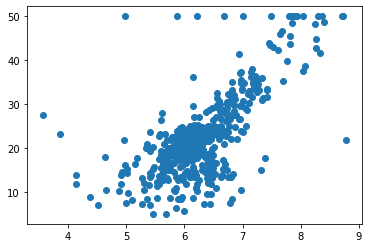

In [6]:
# plot the RM with respect to y
plt.scatter(X_rm,y)
plt.show()

梯度下降 Gradient descent

Assume that the target funciton is a linear function  
$ y = k*X_{rm} + b$

In [7]:
#define target function
def price(x, k, b):
    return k * x + b

定义损失函数 Define mean square loss：观测值与预测值差的绝对值的平均值

$ loss = \frac{1}{n} \sum{|y_i - \hat{y_i}|}$

$ loss = \frac{1}{n} \sum{|y_i - (kx_i + b_i)|} $

In [8]:
# define loss function 
def loss(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

Define partial derivatives

$ \frac{\partial{loss}}{\partial{k}} = -\frac{1}{n}\sum(\frac{y_i - \hat{y_i}}{|y_i - \hat{y_i}|})x_i$

$ \frac{\partial{loss}}{\partial{b}} = -\frac{1}{n}\sum(\frac{y_i - \hat{y_i}}{|y_i - \hat{y_i}|})$

In [9]:
# define partial derivative 
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) / abs(y_i-y_hat_i) * x_i
    return -1/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) / abs(y_i-y_hat_i)
    return -1 / n * gradient

In [10]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

# 学习率一般设为10的负三或负四次方。
# 这里调成负一次方，是因为发现把损失函数定义成绝对值后，梯度下降非常慢，迭代200次后loss还是很大，所以把学习率调到很大。
learning_rate = 1e-1 

iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate #这里k用减法迭代，才能使k取值在最初随机设置的范围内向loss最小的方向移动。
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 394.62950728820925, parameters k is -54.71601462023295 and b is -28.2265539429402
Iteration 1, the loss is 390.57984434994137, parameters k is -54.087551181497766 and b is -28.1265539429402
Iteration 2, the loss is 386.53018141167234, parameters k is -53.459087742762584 and b is -28.026553942940197
Iteration 3, the loss is 382.48051847340406, parameters k is -52.8306243040274 and b is -27.926553942940195
Iteration 4, the loss is 378.43085553513555, parameters k is -52.20216086529222 and b is -27.826553942940194
Iteration 5, the loss is 374.38119259686704, parameters k is -51.57369742655704 and b is -27.726553942940193
Iteration 6, the loss is 370.3315296585988, parameters k is -50.94523398782186 and b is -27.62655394294019
Iteration 7, the loss is 366.2818667203305, parameters k is -50.31677054908668 and b is -27.52655394294019
Iteration 8, the loss is 362.23220378206173, parameters k is -49.688307110351495 and b is -27.42655394294019
Iteration 9, the loss is 3

Iteration 132, the loss is 4.745067438538492, parameters k is 6.52972213866049 and b is -18.573194259145573
Iteration 133, the loss is 4.74501033990565, parameters k is 6.531717197949027 and b is -18.57556580064755
Iteration 134, the loss is 4.744931005920974, parameters k is 6.531189727593296 and b is -18.57833259906652
Iteration 135, the loss is 4.744861208978971, parameters k is 6.530662257237565 and b is -18.58109939748549
Iteration 136, the loss is 4.744796579509849, parameters k is 6.532657316526103 and b is -18.583470938987467
Iteration 137, the loss is 4.744717245525177, parameters k is 6.532129846170371 and b is -18.58623773740644
Iteration 138, the loss is 4.744654979419459, parameters k is 6.53160237581464 and b is -18.58900453582541
Iteration 139, the loss is 4.744582819114046, parameters k is 6.533597435103178 and b is -18.591376077327386
Iteration 140, the loss is 4.744503842286399, parameters k is 6.533069964747447 and b is -18.594142875746357
Iteration 141, the loss is 

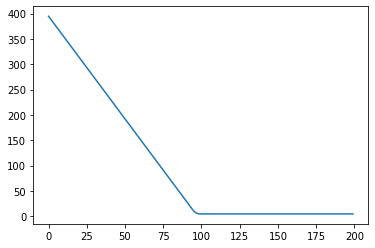

In [11]:
plt.plot(list(range(iteration_num)),losses)
plt.show()

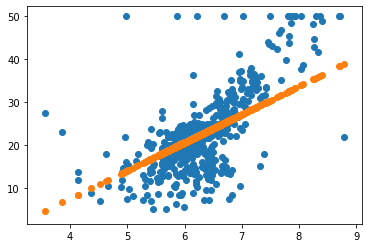

In [12]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)
plt.show()